In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import time

from tqdm import tqdm

# Cargo los datasets

## silkroad_items

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
silkroad_items = pd.read_csv('silkroad_items.csv')

In [4]:
silkroad_items

item_id  \
0                                  jj-luna-privacy-ebooks   
1                              the-morality-of-capitalism   
2                                                 survive   
3                           a-non-religious-new-testament   
4       mindless-slogans-101-cheap-substitutes-for-act...   
...                                                   ...   
401089  us-pharmaceuticals-deca-durabolin-300mg-ml-10m...   
401090  us-pharmaceuticals-dbol-30mg-ml-60ml-fast-ship...   
401091  us-pharmaceuticals-clomid-50mg-ml-60ml-fast-sh...   
401092                   trenbolone-a-100mg-ml-10ml-vails   
401093                    gucci-skeleton-bracelet-replica   

                                                    title  \
0                                  JJ Luna privacy ebooks   
1                              The Morality of Capitalism   
2                                                Survive!   
3                           A Non-Religious New Testament   
4       Mindless Slogans: 101 Cheap Substitutes for Ac...   
...                                                   ...   
401089  ** US Pharmaceuticals Deca Durabolin 300mg/ml ...   
401090  ** US Pharmaceuticals DBOL 30mg/ml 60ml ** Fas...   
401091  ** US Pharmaceuticals Clomid 50mg/ml 60ml ** F...   
401092                   Trenbolone A 100mg/ml 10ml Vails   
401093                    Gucci Skeleton Bracelet Replica   

                                              description          vendor  \
0       \n    JJ Luna is a top privacy consultant. \n\...            echo   
1       \n    This book has been made available to the...            echo   
2       \n    Since the dawn of time, when man first p...            echo   
3       \n    This is essentially the Bible written in...            echo   
4       \n    Think of all the stupid stuff you overhe...            echo   
...                                                   ...             ...   
401089  \n    1 bottle of US Pharmaceuticals Deca Dura...  Bonnie & Clyde   
401090  \n    BACK IN STOCK!! ORDER UP!!\n\n1 bottle o...  Bonnie & Clyde   
401091  \n    1 bottle of US Pharmaceuticals Clomid 50...  Bonnie & Clyde   
401092                       \n    Trenbolone Acetate\n         Roo_Juice   
401093  \n    \n\n◆  Gucci Skeleton Bracelet Replica ◆...        FoxyGirl   

                      price            category            timestamp  \
0                      0.00             Alcohol  2014-02-23T05:39:22   
1                      0.00             Alcohol  2014-02-23T05:39:29   
2                      0.00             Alcohol  2014-02-23T05:39:33   
3                      0.02             Alcohol  2014-02-23T05:39:37   
4                      0.00             Alcohol  2014-02-23T05:39:41   
...                     ...                 ...                  ...   
401089                 0.13   Anabolic Steroids  2015-01-24T17:01:31   
401090                 0.14  Methandrostenolone  2015-01-24T17:01:31   
401091                 0.11       Steroids/PEDs  2015-01-24T17:01:31   
401092                 0.27       Steroids/PEDs  2015-01-24T17:01:31   
401093                 0.05             Alcohol  2015-01-24T17:02:08   

           ships_from       ships_to             image_id  \
0          Undeclared     Undeclared                  NaN   
1          Undeclared     Undeclared               343.00   
2          Undeclared     Undeclared               334.00   
3          Undeclared     Undeclared               352.00   
4          Undeclared     Undeclared               337.00   
...               ...            ...                  ...   
401089  United States  United States             6,254.00   
401090  United States  United States            10,330.00   
401091  United States  United States            10,333.00   
401092      Australia      Australia            28,450.00   
401093          China      Worldwide             2,743.00   

                                            original_path  
0

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
silkroad_items['category'].value_counts()

Alcohol                              79943
Stimulants                           25865
Weed                                 21575
Ecstasy                              18862
MDMA                                 17040
Cannabis                             16082
Cocaine                              14058
LSD                                  11851
Speed                                 9074
Steroids/PEDs                         8295
Drug paraphernalia                    7799
Analgesics                            7328
Other                                 6814
NBOMe                                 6329
Anabolic Steroids                     6309
Benzos                                6038
Alprazolam                            5972
Heroin                                5934
Drugs                                 5688
Dissociatives                         5148
Concentrates                          5020
2C-Family                             4501
Forgeries                             4386
Prescriptio

# Reviso el dataset

In [7]:
pd.set_option('display.max_rows', 10)

In [8]:
silkroad_items

item_id  \
0                                  jj-luna-privacy-ebooks   
1                              the-morality-of-capitalism   
2                                                 survive   
3                           a-non-religious-new-testament   
4       mindless-slogans-101-cheap-substitutes-for-act...   
...                                                   ...   
401089  us-pharmaceuticals-deca-durabolin-300mg-ml-10m...   
401090  us-pharmaceuticals-dbol-30mg-ml-60ml-fast-ship...   
401091  us-pharmaceuticals-clomid-50mg-ml-60ml-fast-sh...   
401092                   trenbolone-a-100mg-ml-10ml-vails   
401093                    gucci-skeleton-bracelet-replica   

                                                    title  \
0                                  JJ Luna privacy ebooks   
1                              The Morality of Capitalism   
2                                                Survive!   
3                           A Non-Religious New Testament   
4       Mindless Slogans: 101 Cheap Substitutes for Ac...   
...                                                   ...   
401089  ** US Pharmaceuticals Deca Durabolin 300mg/ml ...   
401090  ** US Pharmaceuticals DBOL 30mg/ml 60ml ** Fas...   
401091  ** US Pharmaceuticals Clomid 50mg/ml 60ml ** F...   
401092                   Trenbolone A 100mg/ml 10ml Vails   
401093                    Gucci Skeleton Bracelet Replica   

                                              description          vendor  \
0       \n    JJ Luna is a top privacy consultant. \n\...            echo   
1       \n    This book has been made available to the...            echo   
2       \n    Since the dawn of time, when man first p...            echo   
3       \n    This is essentially the Bible written in...            echo   
4       \n    Think of all the stupid stuff you overhe...            echo   
...                                                   ...             ...   
401089  \n    1 bottle of US Pharmaceuticals Deca Dura...  Bonnie & Clyde   
401090  \n    BACK IN STOCK!! ORDER UP!!\n\n1 bottle o...  Bonnie & Clyde   
401091  \n    1 bottle of US Pharmaceuticals Clomid 50...  Bonnie & Clyde   
401092                       \n    Trenbolone Acetate\n         Roo_Juice   
401093  \n    \n\n◆  Gucci Skeleton Bracelet Replica ◆...        FoxyGirl   

                      price            category            timestamp  \
0                      0.00             Alcohol  2014-02-23T05:39:22   
1                      0.00             Alcohol  2014-02-23T05:39:29   
2                      0.00             Alcohol  2014-02-23T05:39:33   
3                      0.02             Alcohol  2014-02-23T05:39:37   
4                      0.00             Alcohol  2014-02-23T05:39:41   
...                     ...                 ...                  ...   
401089                 0.13   Anabolic Steroids  2015-01-24T17:01:31   
401090                 0.14  Methandrostenolone  2015-01-24T17:01:31   
401091                 0.11       Steroids/PEDs  2015-01-24T17:01:31   
401092                 0.27       Steroids/PEDs  2015-01-24T17:01:31   
401093                 0.05             Alcohol  2015-01-24T17:02:08   

           ships_from       ships_to             image_id  \
0          Undeclared     Undeclared                  NaN   
1          Undeclared     Undeclared               343.00   
2          Undeclared     Undeclared               334.00   
3          Undeclared     Undeclared               352.00   
4          Undeclared     Undeclared               337.00   
...               ...            ...                  ...   
401089  United States  United States             6,254.00   
401090  United States  United States            10,330.00   
401091  United States  United States            10,333.00   
401092      Australia      Australia            28,450.00   
401093          China      Worldwide             2,743.00   

                                            original_path  
0

In [9]:
silkroad_items.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401094 entries, 0 to 401093
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        401094 non-null  object 
 1   title          401094 non-null  object 
 2   description    401094 non-null  object 
 3   vendor         401094 non-null  object 
 4   price          401030 non-null  float64
 5   category       401094 non-null  object 
 6   timestamp      401094 non-null  object 
 7   ships_from     400932 non-null  object 
 8   ships_to       400932 non-null  object 
 9   image_id       367673 non-null  float64
 10  original_path  401094 non-null  object 
dtypes: float64(2), object(9)
memory usage: 33.7+ MB


In [10]:
for i in silkroad_items.columns: 
    promedio = 100*silkroad_items[i].isnull().sum()/len(silkroad_items[i])
    print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna item_id tiene 0.0 % de elementos nulos
La columna title tiene 0.0 % de elementos nulos
La columna description tiene 0.0 % de elementos nulos
La columna vendor tiene 0.0 % de elementos nulos
La columna price tiene 0.01595635935715817 % de elementos nulos
La columna category tiene 0.0 % de elementos nulos
La columna timestamp tiene 0.0 % de elementos nulos
La columna ships_from tiene 0.040389534622806623 % de elementos nulos
La columna ships_to tiene 0.040389534622806623 % de elementos nulos
La columna image_id tiene 8.332460719930989 % de elementos nulos
La columna original_path tiene 0.0 % de elementos nulos


OBS: La columna image_id tiene poco mas de un 8% de nulos. Es decir, tengo casos donde no tengo imagenes para entrenar.

In [11]:
for col, values in silkroad_items.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

item_id: 37202
['jj-luna-privacy-ebooks' 'the-morality-of-capitalism' 'survive' ...
 'temazepam-teva-pharma-20mg-capsule-30-caps-45'
 'vextherex-custom-listings' 'valium-teva-10mg-x-14-tabs']


title: 34801
['JJ Luna privacy ebooks' 'The Morality of Capitalism' 'Survive!' ...
 'Temazepam, Teva Pharma, 20mg/capsule, 30 caps - $45'
 ' VexTheRex  custom listings' 'Valium- TEVA 10mg x 14 tabs ']


description: 38555
['\n    JJ Luna is a top privacy consultant. \n\n1. Off the Grid: How to live in a van, trailer, truck, or motorhome\n2. Flat Broke: How to get back on your feet fast\n3. Privacy 101: Why and how to separate your name from your address\n4. Dirty Tricks for Savvy Chicks\n5. Scared? How to Stop a Stalker\n\nThe one I enjoyed the most was "Off the Grid." It explains the pros and cons of living in different kinds of mobile ways. Optimum stuff if you *really* want to disappear.\n\nAll these books are in .pdf, .mobi, and .epub for your Kindle/Nook/iPad reading needs.\n\nIf you haven\

In [12]:
columnas_utiles = silkroad_items[["category","image_id"]]

In [13]:
silkroad_util = columnas_utiles.copy()
silkroad_util

category             image_id
0                  Alcohol                  NaN
1                  Alcohol               343.00
2                  Alcohol               334.00
3                  Alcohol               352.00
4                  Alcohol               337.00
...                    ...                  ...
401089   Anabolic Steroids             6,254.00
401090  Methandrostenolone            10,330.00
401091       Steroids/PEDs            10,333.00
401092       Steroids/PEDs            28,450.00
401093             Alcohol             2,743.00

[401094 rows x 2 columns]

In [14]:
silkroad_util.dropna(inplace = True)
silkroad_util

category             image_id
1                  Alcohol               343.00
2                  Alcohol               334.00
3                  Alcohol               352.00
4                  Alcohol               337.00
6                    Drugs               293.00
...                    ...                  ...
401089   Anabolic Steroids             6,254.00
401090  Methandrostenolone            10,330.00
401091       Steroids/PEDs            10,333.00
401092       Steroids/PEDs            28,450.00
401093             Alcohol             2,743.00

[367673 rows x 2 columns]

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
silkroad_util['category'].value_counts()

Alcohol                              71133
Stimulants                           24372
Weed                                 19587
Ecstasy                              17947
MDMA                                 16013
Cannabis                             14496
Cocaine                              13036
LSD                                  10776
Speed                                 8622
Drug paraphernalia                    7776
Steroids/PEDs                         7428
Other                                 6676
Analgesics                            6239
Anabolic Steroids                     5933
NBOMe                                 5911
Benzos                                5655
Heroin                                5273
Alprazolam                            5265
Dissociatives                         4850
Drugs                                 4791
Concentrates                          4413
Forgeries                             4059
2C-Family                             3856
Diazepam   

In [17]:
pd.set_option('display.max_rows', 10)

# Cargo las imágenes

In [18]:
import cv2
import os

def load_images_from_folder(folder):
    diccionario_de_imagenes = {}
    # images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        # print(filename)
        # print(img)
        if img is not None:
            # Saco los ultimos 4 carateres de filename que son: ".jpg" asi me qeuda como clave solo el numero de la inmagen
            diccionario_de_imagenes.update({int(filename[:-4]) : img})
            # images.append(img)
    # return images
    return diccionario_de_imagenes

In [19]:
import cv2
import os

def load_images_from_folder_with_plt(folder):
    diccionario_de_imagenes = {}
    # images = []
    for filename in os.listdir(folder):
        img = plt.imread(os.path.join(folder,filename))
        # print(filename)
        # print(img)
        if img is not None:
            # Saco los ultimos 4 carateres de filename que son: ".jpg" asi me qeuda como clave solo el numero de la inmagen
            diccionario_de_imagenes.update({int(filename[:-4]) : img})
            # images.append(img)
    # return images
    return diccionario_de_imagenes

In [20]:
diccionario_de_imagenes = load_images_from_folder('C:\\Camila\\FIUBA\\Depto. Computacion\\Orga de Datos\\2C 2021\\TP4\\silkroad2_images\\images_by_id')
diccionario_de_imagenes

{10001: array([[[255, 255, 186],
         [255, 252, 191],
         [255, 255, 219],
         ...,
         [226, 238, 255],
         [229, 247, 230],
         [246, 255, 216]],
 
        [[255, 250, 214],
         [255, 242, 223],
         [244, 251, 254],
         ...,
         [232, 246, 255],
         [237, 255, 239],
         [245, 255, 218]],
 
        [[238, 249, 255],
         [214, 236, 255],
         [190, 232, 255],
         ...,
         [221, 236, 255],
         [236, 255, 245],
         [242, 255, 219]],
 
        ...,
 
        [[238, 248, 236],
         [223, 244, 246],
         [207, 241, 255],
         ...,
         [177, 217, 255],
         [223, 246, 255],
         [236, 245, 249]],
 
        [[241, 252, 236],
         [224, 245, 246],
         [209, 243, 255],
         ...,
         [184, 222, 255],
         [223, 246, 255],
         [234, 243, 246]],
 
        [[251, 255, 241],
         [231, 252, 249],
         [215, 250, 255],
         ...,
         [189, 227, 2

In [21]:
len(diccionario_de_imagenes)

30594

In [22]:
values_del_diccionario = list(diccionario_de_imagenes.values())
# values_del_diccionario

In [23]:
claves_del_diccionario = list(diccionario_de_imagenes.keys())

Estan todas las imagenes! :)

In [24]:
import cv2
import os

def load_images_from_folder_to_list(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_COLOR)
        if img is not None:
            images.append(img)
    return images

In [25]:
lista_de_imagenes = load_images_from_folder_to_list('C:\\Camila\\FIUBA\\Depto. Computacion\\Orga de Datos\\2C 2021\\TP4\\silkroad2_images\\images_by_id')
lista_de_imagenes

[array([[[255, 255, 186],
         [255, 252, 191],
         [255, 255, 219],
         ...,
         [226, 238, 255],
         [229, 247, 230],
         [246, 255, 216]],
 
        [[255, 250, 214],
         [255, 242, 223],
         [244, 251, 254],
         ...,
         [232, 246, 255],
         [237, 255, 239],
         [245, 255, 218]],
 
        [[238, 249, 255],
         [214, 236, 255],
         [190, 232, 255],
         ...,
         [221, 236, 255],
         [236, 255, 245],
         [242, 255, 219]],
 
        ...,
 
        [[238, 248, 236],
         [223, 244, 246],
         [207, 241, 255],
         ...,
         [177, 217, 255],
         [223, 246, 255],
         [236, 245, 249]],
 
        [[241, 252, 236],
         [224, 245, 246],
         [209, 243, 255],
         ...,
         [184, 222, 255],
         [223, 246, 255],
         [234, 243, 246]],
 
        [[251, 255, 241],
         [231, 252, 249],
         [215, 250, 255],
         ...,
         [189, 227, 255],
  

In [26]:
lista_de_imagenes[0]

array([[[255, 255, 186],
        [255, 252, 191],
        [255, 255, 219],
        ...,
        [226, 238, 255],
        [229, 247, 230],
        [246, 255, 216]],

       [[255, 250, 214],
        [255, 242, 223],
        [244, 251, 254],
        ...,
        [232, 246, 255],
        [237, 255, 239],
        [245, 255, 218]],

       [[238, 249, 255],
        [214, 236, 255],
        [190, 232, 255],
        ...,
        [221, 236, 255],
        [236, 255, 245],
        [242, 255, 219]],

       ...,

       [[238, 248, 236],
        [223, 244, 246],
        [207, 241, 255],
        ...,
        [177, 217, 255],
        [223, 246, 255],
        [236, 245, 249]],

       [[241, 252, 236],
        [224, 245, 246],
        [209, 243, 255],
        ...,
        [184, 222, 255],
        [223, 246, 255],
        [234, 243, 246]],

       [[251, 255, 241],
        [231, 252, 249],
        [215, 250, 255],
        ...,
        [189, 227, 255],
        [223, 247, 255],
        [234, 241, 244]]

In [27]:
#cv2.imshow('prueba',lista_de_imagenes[0])

Pruebo cargar una imagen para chequear que se vea bien. Para usar plt hay que cambiar el orden de BGR (que usa cv2) a RGB (que es el que usa plt)

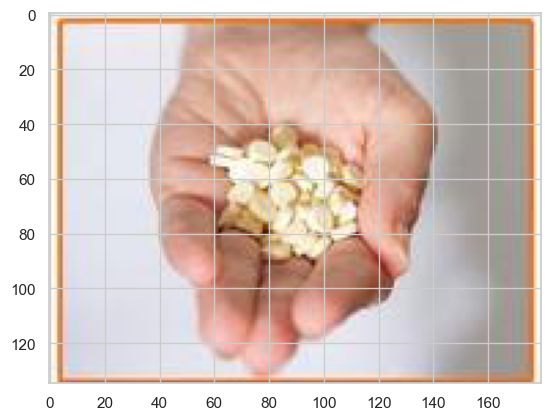

In [28]:
plt.imshow(cv2.cvtColor(lista_de_imagenes[0], cv2.COLOR_BGR2RGB))

Las imagenes se cargan bien

In [29]:
lista_de_imagenes[0].shape

(135, 180, 3)

In [30]:
lista_de_imagenes[0].shape

(135, 180, 3)

# Agrego las imagenes al dataset

In [31]:
pd.set_option('display.max_rows', 10)

In [32]:
silkroad_con_imagenes = silkroad_util.copy()
silkroad_con_imagenes

category             image_id
1                  Alcohol               343.00
2                  Alcohol               334.00
3                  Alcohol               352.00
4                  Alcohol               337.00
6                    Drugs               293.00
...                    ...                  ...
401089   Anabolic Steroids             6,254.00
401090  Methandrostenolone            10,330.00
401091       Steroids/PEDs            10,333.00
401092       Steroids/PEDs            28,450.00
401093             Alcohol             2,743.00

[367673 rows x 2 columns]

In [33]:
silkroad_con_imagenes['image_id'] = silkroad_con_imagenes['image_id'].astype(int)
silkroad_con_imagenes

category  image_id
1                  Alcohol       343
2                  Alcohol       334
3                  Alcohol       352
4                  Alcohol       337
6                    Drugs       293
...                    ...       ...
401089   Anabolic Steroids      6254
401090  Methandrostenolone     10330
401091       Steroids/PEDs     10333
401092       Steroids/PEDs     28450
401093             Alcohol      2743

[367673 rows x 2 columns]

In [34]:
silkroad_con_imagenes.drop_duplicates(inplace = True)
silkroad_con_imagenes

category  image_id
1          Alcohol       343
2          Alcohol       334
3          Alcohol       352
4          Alcohol       337
6            Drugs       293
...            ...       ...
400534     Alcohol     32841
400541  Stimulants     31195
400553     Alcohol     32844
400773      Benzos     29529
401050    Diazepam     32415

[42679 rows x 2 columns]

In [35]:
silkroad_con_imagenes.sort_values(by = ['image_id'], inplace = True)
silkroad_con_imagenes

category  image_id
133449    Cubensis         7
10676      Shrooms         7
946            DMT        11
141512    Crystals        11
6159         Other        15
...            ...       ...
390768     Ecstasy     55311
390825     Ecstasy     55313
390785     Ecstasy     55316
395444  Stimulants     55371
389844     Ecstasy     55447

[42679 rows x 2 columns]

In [36]:
pd.set_option('display.max_rows', 10)

In [37]:
for col, values in silkroad_con_imagenes.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

category: 301
['Cubensis' 'Shrooms' 'DMT' 'Crystals' 'Other' 'Tobacco' 'Heroin'
 'Edibles' 'Steroids/PEDs' 'Viagra' 'Sildenafil Citrate'
 'Methandrostenolone' 'Psychedelics' 'Stimulants' 'Cocaine' 'Speed' 'Weed'
 'Apparel' 'Books' 'Alcohol' 'LSD' 'Drugs' 'Analgesics' 'Mescaline'
 'Powder' 'Digital' 'Forgeries' 'Packaging' 'Ecstasy' 'Tadalafil' 'GHB'
 'Prescription' 'Cannabis' 'MDMA' 'DOM' 'DOx' 'Pills' 'Methylphenidate'
 '2C-Family' 'Intoxicants' 'Drug paraphernalia' 'DOB' 'Pipes' 'Alprazolam'
 'Lotteries & games' 'Opioids' 'Changa' 'Services' 'Oxycodone'
 'Dissociatives' 'Dry' 'Sativa dominant' 'Midazolam' 'Benzos' 'Clonazepam'
 'Amphetamine' 'Anticonvulsant' 'General health' 'Blotter' 'Sleep aids'
 'Relaxants' 'Ritalin' 'Precursors' 'Oxymorphone' 'Accessories'
 'Rolling Supplies' 'Concentrates' 'Writing' 'Vardenafil' 'Scales'
 'Dapoxetine' 'Diazepam' 'Lorazepam' 'Levitra' 'Cialis' 'Cyanescens'
 'Seeds' 'Jewelry' 'ketamine' 'Vyvanse' 'Adderall' 'Dexamphetamine'
 'Capsules' 'Liquid' 'E

In [38]:
array_categorias = silkroad_con_imagenes.to_numpy()
array_categorias

array([['Cubensis', 7],
       ['Shrooms', 7],
       ['DMT', 11],
       ...,
       ['Ecstasy', 55316],
       ['Stimulants', 55371],
       ['Ecstasy', 55447]], dtype=object)

In [39]:
array_ids = silkroad_con_imagenes['image_id'].to_numpy()
array_ids

array([    7,     7,    11, ..., 55316, 55371, 55447])

In [40]:
len(array_ids)

42679

In [41]:
df_imagenes = pd.DataFrame()

In [42]:
df_imagenes = pd.concat([df_imagenes, pd.Series(values_del_diccionario).to_frame()], ignore_index=True)
df_imagenes

0
0      [[[255, 255, 186], [255, 252, 191], [255, 255,...
1      [[[255, 255, 186], [255, 252, 191], [255, 255,...
2      [[[141, 171, 190], [141, 171, 190], [141, 171,...
3      [[[201, 209, 209], [201, 209, 209], [201, 209,...
4      [[[201, 209, 209], [201, 209, 209], [201, 209,...
...                                                  ...
30589  [[[124, 143, 140], [124, 141, 138], [125, 139,...
30590  [[[60, 78, 89], [60, 78, 89], [61, 78, 91], [6...
30591  [[[124, 143, 140], [124, 141, 138], [125, 139,...
30592  [[[58, 61, 65], [60, 63, 68], [62, 66, 71], [6...
30593  [[[255, 255, 186], [255, 252, 191], [255, 255,...

[30594 rows x 1 columns]

In [43]:
df_imagenes.rename(columns={0: "image_array"}, inplace = True)
df_imagenes

image_array
0      [[[255, 255, 186], [255, 252, 191], [255, 255,...
1      [[[255, 255, 186], [255, 252, 191], [255, 255,...
2      [[[141, 171, 190], [141, 171, 190], [141, 171,...
3      [[[201, 209, 209], [201, 209, 209], [201, 209,...
4      [[[201, 209, 209], [201, 209, 209], [201, 209,...
...                                                  ...
30589  [[[124, 143, 140], [124, 141, 138], [125, 139,...
30590  [[[60, 78, 89], [60, 78, 89], [61, 78, 91], [6...
30591  [[[124, 143, 140], [124, 141, 138], [125, 139,...
30592  [[[58, 61, 65], [60, 63, 68], [62, 66, 71], [6...
30593  [[[255, 255, 186], [255, 252, 191], [255, 255,...

[30594 rows x 1 columns]

In [44]:
df_imagenes['image_id'] = claves_del_diccionario
df_imagenes

image_array  image_id
0      [[[255, 255, 186], [255, 252, 191], [255, 255,...     10001
1      [[[255, 255, 186], [255, 252, 191], [255, 255,...     10002
2      [[[141, 171, 190], [141, 171, 190], [141, 171,...     10003
3      [[[201, 209, 209], [201, 209, 209], [201, 209,...     10004
4      [[[201, 209, 209], [201, 209, 209], [201, 209,...     10005
...                                                  ...       ...
30589  [[[124, 143, 140], [124, 141, 138], [125, 139,...      9994
30590  [[[60, 78, 89], [60, 78, 89], [61, 78, 91], [6...      9995
30591  [[[124, 143, 140], [124, 141, 138], [125, 139,...      9996
30592  [[[58, 61, 65], [60, 63, 68], [62, 66, 71], [6...      9997
30593  [[[255, 255, 186], [255, 252, 191], [255, 255,...      9999

[30594 rows x 2 columns]

In [45]:
df_imagenes.sort_values(by = ['image_id'], inplace = True)
df_imagenes

image_array  image_id
28522  [[[164, 168, 179], [164, 168, 179], [164, 168,...         7
758    [[[127, 121, 144], [134, 129, 150], [140, 133,...        11
3351   [[[164, 161, 193], [160, 156, 192], [157, 151,...        15
4518   [[[37, 93, 148], [38, 94, 149], [38, 94, 149],...        17
5774   [[[15, 18, 22], [14, 17, 21], [14, 17, 21], [1...        19
...                                                  ...       ...
27638  [[[106, 105, 107], [106, 105, 107], [107, 106,...     55307
27640  [[[103, 138, 164], [91, 126, 152], [79, 113, 1...     55311
27641  [[[112, 136, 166], [100, 124, 154], [88, 112, ...     55313
27642  [[[117, 144, 171], [101, 128, 155], [84, 112, ...     55316
27644  [[[150, 176, 182], [150, 176, 182], [150, 176,...     55371

[30594 rows x 2 columns]

In [46]:
silkroad_con_imagenes

category  image_id
133449    Cubensis         7
10676      Shrooms         7
946            DMT        11
141512    Crystals        11
6159         Other        15
...            ...       ...
390768     Ecstasy     55311
390825     Ecstasy     55313
390785     Ecstasy     55316
395444  Stimulants     55371
389844     Ecstasy     55447

[42679 rows x 2 columns]

In [47]:
silkroad_con_imagenes = pd.merge(silkroad_con_imagenes, df_imagenes, on='image_id', how = 'inner')
silkroad_con_imagenes

category  image_id                                        image_array
0        Cubensis         7  [[[164, 168, 179], [164, 168, 179], [164, 168,...
1         Shrooms         7  [[[164, 168, 179], [164, 168, 179], [164, 168,...
2             DMT        11  [[[127, 121, 144], [134, 129, 150], [140, 133,...
3        Crystals        11  [[[127, 121, 144], [134, 129, 150], [140, 133,...
4           Other        15  [[[164, 161, 193], [160, 156, 192], [157, 151,...
...           ...       ...                                                ...
40360  Stimulants     55307  [[[106, 105, 107], [106, 105, 107], [107, 106,...
40361     Ecstasy     55311  [[[103, 138, 164], [91, 126, 152], [79, 113, 1...
40362     Ecstasy     55313  [[[112, 136, 166], [100, 124, 154], [88, 112, ...
40363     Ecstasy     55316  [[[117, 144, 171], [101, 128, 155], [84, 112, ...
40364  Stimulants     55371  [[[150, 176, 182], [150, 176, 182], [150, 176,...

[40365 rows x 3 columns]

In [48]:
silkroad_items.sort_values(by = ['image_id'], inplace = True)
silkroad_items

item_id  \
204196                         7g-1-4oz-p-cubensis-powder   
217623                         7g-1-4oz-p-cubensis-powder   
10676                          7g-1-4oz-p-cubensis-powder   
107399                         7g-1-4oz-p-cubensis-powder   
213562                         7g-1-4oz-p-cubensis-powder   
...                                                   ...   
401020  via-uk-rexobol-10-stanozolol-tabs-10mg-alpha-p...   
401038                            valentine-s-day-special   
401043            vape-pen-co2-oil-pre-filled-atomizer-1g   
401059                           usps-tracking-labels-x50   
401076           useful-tool-for-use-with-my-gaming-guide   

                                                    title  \
204196                       7g (1/4oz) P.Cubensis Powder   
217623                       7g (1/4oz) P.Cubensis Powder   
10676                        7g (1/4oz) P.Cubensis Powder   
107399                       7g (1/4oz) P.Cubensis Powder   
213562                       7g (1/4oz) P.Cubensis Powder   
...                                                   ...   
401020  via UK Rexobol-10 Stanozolol Tabs 10mg Alpha P...   
401038                            Valentine's Day Special   
401043        Vape Pen CO2 Oil - Pre-Filled Atomizer (1g)   
401059                           USPS Tracking Labels x50   
401076           Useful tool for use with my gaming guide   

                                              description        vendor  \
204196  \n    \n\nWelcome to the oldest drug listing o...      MagicTed   
217623  \n    \n\nWelcome to the oldest drug listing o...      MagicTed   
10676   \n    Welcome to the oldest drug listing on Si...      MagicTed   
107399  \n    \n\nWelcome to the oldest drug listing o...      MagicTed   
213562  \n    \n\nWelcome to the oldest drug listing o...      MagicTed   
...                                                   ...           ...   
401020  \n    Rexobol-10 Stanozolol Tabs 10mg Alpha Ph...       gotmilk   
401038  \n    100 grams of our canabutter candy shaped...        sallee   
401043  \n    Pre-filled atomizer attachment for the E...  HerbalHealer   
401059  \n    1 pad of 50 USPS Tracking™ labels - aka ...       Quixote   
401076  \n    Please only purchase this item if you ha...  Whitenose-UK   

                      price       category            timestamp  \
204196                 0.06        Shrooms  2014-08-24T09:18:10   
217623                 0.06        Shrooms  2014-08-28T04:19:56   
10676                  0.04        Shrooms  2014-06-10T19:39:10   
107399                 0.06        Shrooms  2014-06-10T20:11:00   
213562                 0.06        Shrooms  2014-08-27T02:37:03   
...                     ...            ...                  ...   
401020                 0.34  Steroids/PEDs  2015-01-24T17:01:31   
401038                 0.06        Edibles  2015-01-24T17:01:31   
401043                 0.10   Concentrates  2015-01-24T17:01:31   
401059                 0.01        Alcohol  2015-01-24T17:01:31   
401076                 0.04        Alcohol  2015-01-24T17:01:31   

            ships_from        ships_to             image_id  \
204196     Netherlands       Worldwide                 7.00   
217623     Netherlands       Worldwide                 7.00   
10676      Netherlands       Worldwide                 7.00   
107399     Netherlands       Worldwide                 7.00   
213562     Netherlands       Worldwide                 7.00   
...                ...             ...                  ...   
401020           India       Worldwide                  NaN   
401038   United States   United States                  NaN   
401043   United States       Worldwide                  NaN   
401059   United States   United States                  NaN   
401076  United Kingdom  United Kingdom                  NaN   

                                            original_path  
204196  2014-08-27/items/7g-1-4oz-p-cubensis-powder_fe...  
2

In [49]:
silkroad_items.dropna(inplace= True)
silkroad_items

item_id  \
204196           7g-1-4oz-p-cubensis-powder   
217623           7g-1-4oz-p-cubensis-powder   
10676            7g-1-4oz-p-cubensis-powder   
107399           7g-1-4oz-p-cubensis-powder   
213562           7g-1-4oz-p-cubensis-powder   
...                                     ...   
390768       3-blue-spooky-pills-130mg-mdma   
390825      10-blue-spooky-pills-130mg-mdma   
390785     100-blue-spooky-pills-130mg-mdma   
395444            1g-lower-quality-ice-meth   
389844  10g-m11-dimethylone-crystal-99-pure   

                                          title  \
204196             7g (1/4oz) P.Cubensis Powder   
217623             7g (1/4oz) P.Cubensis Powder   
10676              7g (1/4oz) P.Cubensis Powder   
107399             7g (1/4oz) P.Cubensis Powder   
213562             7g (1/4oz) P.Cubensis Powder   
...                                         ...   
390768          3 Blue Spooky Pills 130mg MDMA+   
390825        10  Blue Spooky Pills 130mg MDMA+   
390785        100 Blue Spooky Pills 130mg MDMA+   
395444    ҳ̸Ҳ̸ҳ 1g Lower Quality Ice/Meth ҳ̸Ҳ̸ҳ   
389844  10g M11 Dimethylone Crystal (99%+ Pure)   

                                              description             vendor  \
204196  \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
217623  \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
10676   \n    Welcome to the oldest drug listing on Si...           MagicTed   
107399  \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
213562  \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
...                                                   ...                ...   
390768  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
390825  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
390785  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
395444  \n    This listing is for 1g of lower quality ...          IceIceIce   
389844  \n    This is lab tested bk-mddma AKA dimethyl...           Montfort   

                      price    category            timestamp   ships_from  \
204196                 0.06     Shrooms  2014-08-24T09:18:10  Netherlands   
217623                 0.06     Shrooms  2014-08-28T04:19:56  Netherlands   
10676                  0.04     Shrooms  2014-06-10T19:39:10  Netherlands   
107399                 0.06     Shrooms  2014-06-10T20:11:00  Netherlands   
213562                 0.06     Shrooms  2014-08-27T02:37:03  Netherlands   
...                     ...         ...                  ...          ...   
390768                 0.06     Ecstasy  2014-11-05T17:39:59  Netherlands   
390825                 0.15     Ecstasy  2014-11-05T17:52:25  Netherlands   
390785                 0.91     Ecstasy  2014-11-05T17:49:07  Netherlands   
395444                 0.81  Stimulants  2014-11-06T08:28:55    Australia   
389844                 0.24     Ecstasy  2014-11-05T11:36:12   Undeclared   

                          ships_to             image_id  \
204196                   Worldwide                 7.00   
217623                   Worldwide                 7.00   
10676                    Worldwide                 7.00   
107399                   Worldwide                 7.00   
213562                   Worldwide                 7.00   
...                            ...                  ...   
390768  Worldwide except Australia            55,311.00   
390825  Worldwide except Australia            55,313.00   
390785  Worldwide except Australia            55,316.00   
395444                   Australia            55,371.00   
389844                   Worldwide            55,447.00   

                                            original_path  
204196  2014-08-27/items/7g-1-4oz-p-cubensis-powder_fe...  
217623  2014-08-30/items/7g-1-4oz-p-cubensis-powder_fe...  
10676         2014-01-16/items/7g-1-4oz-p-cubensis-powder  
107399        2014-05-2

In [50]:
silkroad_items_con_imagenes = pd.merge(silkroad_con_imagenes, silkroad_items, on='image_id', how = 'inner')
silkroad_items_con_imagenes

category_x  image_id  \
0         Cubensis         7   
1         Cubensis         7   
2         Cubensis         7   
3         Cubensis         7   
4         Cubensis         7   
...            ...       ...   
585040  Stimulants     55307   
585041     Ecstasy     55311   
585042     Ecstasy     55313   
585043     Ecstasy     55316   
585044  Stimulants     55371   

                                              image_array  \
0       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
1       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
2       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
3       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
4       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
...                                                   ...   
585040  [[[106, 105, 107], [106, 105, 107], [107, 106,...   
585041  [[[103, 138, 164], [91, 126, 152], [79, 113, 1...   
585042  [[[112, 136, 166], [100, 124, 154], [88, 112, ...   
585043  [[[117, 144, 171], [101, 128, 155], [84, 112, ...   
585044  [[[150, 176, 182], [150, 176, 182], [150, 176,...   

                                   item_id  \
0               7g-1-4oz-p-cubensis-powder   
1               7g-1-4oz-p-cubensis-powder   
2               7g-1-4oz-p-cubensis-powder   
3               7g-1-4oz-p-cubensis-powder   
4               7g-1-4oz-p-cubensis-powder   
...                                    ...   
585040  500g-ethylphenidate-powder-99-pure   
585041      3-blue-spooky-pills-130mg-mdma   
585042     10-blue-spooky-pills-130mg-mdma   
585043    100-blue-spooky-pills-130mg-mdma   
585044           1g-lower-quality-ice-meth   

                                         title  \
0                 7g (1/4oz) P.Cubensis Powder   
1                 7g (1/4oz) P.Cubensis Powder   
2                 7g (1/4oz) P.Cubensis Powder   
3                 7g (1/4oz) P.Cubensis Powder   
4                 7g (1/4oz) P.Cubensis Powder   
...                                        ...   
585040  500g Ethylphenidate Powder (99%+ Pure)   
585041         3 Blue Spooky Pills 130mg MDMA+   
585042       10  Blue Spooky Pills 130mg MDMA+   
585043       100 Blue Spooky Pills 130mg MDMA+   
585044   ҳ̸Ҳ̸ҳ 1g Lower Quality Ice/Meth ҳ̸Ҳ̸ҳ   

                                              description             vendor  \
0       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
1       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
2       \n    Welcome to the oldest drug listing on Si...           MagicTed   
3       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
4       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
...                                                   ...                ...   
585040  \n    Ethylphenidate (EP) is a psychostimulant...           Montfort   
585041  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585042  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585043  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585044  \n    This listing is for 1g of lower quality ...          IceIceIce   

                      price  category_y            timestamp   ships_from  \
0                      0.06     Shrooms  2014-08-24T09:18:10  Netherlands   
1                      0.06     Shrooms  2014-08-28T04:19:56  Netherlands   
2                      0.04     Shrooms  2014-06-10T19:39:10  Netherlands   
3                      0.06     Shrooms  2014-06-10T20:11:00  Netherlands   
4                      0.06     Shrooms  2014-08-27T02:37:03  Netherlands   
...                     ...         ...                  ...          ...   
585040                 7.10  Stimulants  2014-11-06T00:50:23   Undeclared   
585041                 0.06     Ecstasy  2014-11-05T17:39:59  Netherlands   
585042                 0.15     Ecstasy  2014-11-05T17:52:25  Netherlands   
58504

In [51]:
silkroad_items_con_imagenes.dropna(inplace= True)
silkroad_items_con_imagenes

category_x  image_id  \
0         Cubensis         7   
1         Cubensis         7   
2         Cubensis         7   
3         Cubensis         7   
4         Cubensis         7   
...            ...       ...   
585040  Stimulants     55307   
585041     Ecstasy     55311   
585042     Ecstasy     55313   
585043     Ecstasy     55316   
585044  Stimulants     55371   

                                              image_array  \
0       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
1       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
2       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
3       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
4       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
...                                                   ...   
585040  [[[106, 105, 107], [106, 105, 107], [107, 106,...   
585041  [[[103, 138, 164], [91, 126, 152], [79, 113, 1...   
585042  [[[112, 136, 166], [100, 124, 154], [88, 112, ...   
585043  [[[117, 144, 171], [101, 128, 155], [84, 112, ...   
585044  [[[150, 176, 182], [150, 176, 182], [150, 176,...   

                                   item_id  \
0               7g-1-4oz-p-cubensis-powder   
1               7g-1-4oz-p-cubensis-powder   
2               7g-1-4oz-p-cubensis-powder   
3               7g-1-4oz-p-cubensis-powder   
4               7g-1-4oz-p-cubensis-powder   
...                                    ...   
585040  500g-ethylphenidate-powder-99-pure   
585041      3-blue-spooky-pills-130mg-mdma   
585042     10-blue-spooky-pills-130mg-mdma   
585043    100-blue-spooky-pills-130mg-mdma   
585044           1g-lower-quality-ice-meth   

                                         title  \
0                 7g (1/4oz) P.Cubensis Powder   
1                 7g (1/4oz) P.Cubensis Powder   
2                 7g (1/4oz) P.Cubensis Powder   
3                 7g (1/4oz) P.Cubensis Powder   
4                 7g (1/4oz) P.Cubensis Powder   
...                                        ...   
585040  500g Ethylphenidate Powder (99%+ Pure)   
585041         3 Blue Spooky Pills 130mg MDMA+   
585042       10  Blue Spooky Pills 130mg MDMA+   
585043       100 Blue Spooky Pills 130mg MDMA+   
585044   ҳ̸Ҳ̸ҳ 1g Lower Quality Ice/Meth ҳ̸Ҳ̸ҳ   

                                              description             vendor  \
0       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
1       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
2       \n    Welcome to the oldest drug listing on Si...           MagicTed   
3       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
4       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
...                                                   ...                ...   
585040  \n    Ethylphenidate (EP) is a psychostimulant...           Montfort   
585041  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585042  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585043  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585044  \n    This listing is for 1g of lower quality ...          IceIceIce   

                      price  category_y            timestamp   ships_from  \
0                      0.06     Shrooms  2014-08-24T09:18:10  Netherlands   
1                      0.06     Shrooms  2014-08-28T04:19:56  Netherlands   
2                      0.04     Shrooms  2014-06-10T19:39:10  Netherlands   
3                      0.06     Shrooms  2014-06-10T20:11:00  Netherlands   
4                      0.06     Shrooms  2014-08-27T02:37:03  Netherlands   
...                     ...         ...                  ...          ...   
585040                 7.10  Stimulants  2014-11-06T00:50:23   Undeclared   
585041                 0.06     Ecstasy  2014-11-05T17:39:59  Netherlands   
585042                 0.15     Ecstasy  2014-11-05T17:52:25  Netherlands   
58504

In [52]:
silkroad_items_con_imagenes.rename(columns={"category_x": "category"}, inplace = True)
silkroad_items_con_imagenes

category  image_id  \
0         Cubensis         7   
1         Cubensis         7   
2         Cubensis         7   
3         Cubensis         7   
4         Cubensis         7   
...            ...       ...   
585040  Stimulants     55307   
585041     Ecstasy     55311   
585042     Ecstasy     55313   
585043     Ecstasy     55316   
585044  Stimulants     55371   

                                              image_array  \
0       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
1       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
2       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
3       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
4       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
...                                                   ...   
585040  [[[106, 105, 107], [106, 105, 107], [107, 106,...   
585041  [[[103, 138, 164], [91, 126, 152], [79, 113, 1...   
585042  [[[112, 136, 166], [100, 124, 154], [88, 112, ...   
585043  [[[117, 144, 171], [101, 128, 155], [84, 112, ...   
585044  [[[150, 176, 182], [150, 176, 182], [150, 176,...   

                                   item_id  \
0               7g-1-4oz-p-cubensis-powder   
1               7g-1-4oz-p-cubensis-powder   
2               7g-1-4oz-p-cubensis-powder   
3               7g-1-4oz-p-cubensis-powder   
4               7g-1-4oz-p-cubensis-powder   
...                                    ...   
585040  500g-ethylphenidate-powder-99-pure   
585041      3-blue-spooky-pills-130mg-mdma   
585042     10-blue-spooky-pills-130mg-mdma   
585043    100-blue-spooky-pills-130mg-mdma   
585044           1g-lower-quality-ice-meth   

                                         title  \
0                 7g (1/4oz) P.Cubensis Powder   
1                 7g (1/4oz) P.Cubensis Powder   
2                 7g (1/4oz) P.Cubensis Powder   
3                 7g (1/4oz) P.Cubensis Powder   
4                 7g (1/4oz) P.Cubensis Powder   
...                                        ...   
585040  500g Ethylphenidate Powder (99%+ Pure)   
585041         3 Blue Spooky Pills 130mg MDMA+   
585042       10  Blue Spooky Pills 130mg MDMA+   
585043       100 Blue Spooky Pills 130mg MDMA+   
585044   ҳ̸Ҳ̸ҳ 1g Lower Quality Ice/Meth ҳ̸Ҳ̸ҳ   

                                              description             vendor  \
0       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
1       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
2       \n    Welcome to the oldest drug listing on Si...           MagicTed   
3       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
4       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
...                                                   ...                ...   
585040  \n    Ethylphenidate (EP) is a psychostimulant...           Montfort   
585041  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585042  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585043  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585044  \n    This listing is for 1g of lower quality ...          IceIceIce   

                      price  category_y            timestamp   ships_from  \
0                      0.06     Shrooms  2014-08-24T09:18:10  Netherlands   
1                      0.06     Shrooms  2014-08-28T04:19:56  Netherlands   
2                      0.04     Shrooms  2014-06-10T19:39:10  Netherlands   
3                      0.06     Shrooms  2014-06-10T20:11:00  Netherlands   
4                      0.06     Shrooms  2014-08-27T02:37:03  Netherlands   
...                     ...         ...                  ...          ...   
585040                 7.10  Stimulants  2014-11-06T00:50:23   Undeclared   
585041                 0.06     Ecstasy  2014-11-05T17:39:59  Netherlands   
585042                 0.15     Ecstasy  2014-11-05T17:52:25  Netherlands   
585043 

In [53]:
silkroad_items_con_imagenes.drop(['category_y'], axis=1, inplace = True)
silkroad_items_con_imagenes

category  image_id  \
0         Cubensis         7   
1         Cubensis         7   
2         Cubensis         7   
3         Cubensis         7   
4         Cubensis         7   
...            ...       ...   
585040  Stimulants     55307   
585041     Ecstasy     55311   
585042     Ecstasy     55313   
585043     Ecstasy     55316   
585044  Stimulants     55371   

                                              image_array  \
0       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
1       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
2       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
3       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
4       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
...                                                   ...   
585040  [[[106, 105, 107], [106, 105, 107], [107, 106,...   
585041  [[[103, 138, 164], [91, 126, 152], [79, 113, 1...   
585042  [[[112, 136, 166], [100, 124, 154], [88, 112, ...   
585043  [[[117, 144, 171], [101, 128, 155], [84, 112, ...   
585044  [[[150, 176, 182], [150, 176, 182], [150, 176,...   

                                   item_id  \
0               7g-1-4oz-p-cubensis-powder   
1               7g-1-4oz-p-cubensis-powder   
2               7g-1-4oz-p-cubensis-powder   
3               7g-1-4oz-p-cubensis-powder   
4               7g-1-4oz-p-cubensis-powder   
...                                    ...   
585040  500g-ethylphenidate-powder-99-pure   
585041      3-blue-spooky-pills-130mg-mdma   
585042     10-blue-spooky-pills-130mg-mdma   
585043    100-blue-spooky-pills-130mg-mdma   
585044           1g-lower-quality-ice-meth   

                                         title  \
0                 7g (1/4oz) P.Cubensis Powder   
1                 7g (1/4oz) P.Cubensis Powder   
2                 7g (1/4oz) P.Cubensis Powder   
3                 7g (1/4oz) P.Cubensis Powder   
4                 7g (1/4oz) P.Cubensis Powder   
...                                        ...   
585040  500g Ethylphenidate Powder (99%+ Pure)   
585041         3 Blue Spooky Pills 130mg MDMA+   
585042       10  Blue Spooky Pills 130mg MDMA+   
585043       100 Blue Spooky Pills 130mg MDMA+   
585044   ҳ̸Ҳ̸ҳ 1g Lower Quality Ice/Meth ҳ̸Ҳ̸ҳ   

                                              description             vendor  \
0       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
1       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
2       \n    Welcome to the oldest drug listing on Si...           MagicTed   
3       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
4       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
...                                                   ...                ...   
585040  \n    Ethylphenidate (EP) is a psychostimulant...           Montfort   
585041  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585042  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585043  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585044  \n    This listing is for 1g of lower quality ...          IceIceIce   

                      price            timestamp   ships_from  \
0                      0.06  2014-08-24T09:18:10  Netherlands   
1                      0.06  2014-08-28T04:19:56  Netherlands   
2                      0.04  2014-06-10T19:39:10  Netherlands   
3                      0.06  2014-06-10T20:11:00  Netherlands   
4                      0.06  2014-08-27T02:37:03  Netherlands   
...                     ...                  ...          ...   
585040                 7.10  2014-11-06T00:50:23   Undeclared   
585041                 0.06  2014-11-05T17:39:59  Netherlands   
585042                 0.15  2014-11-05T17:52:25  Netherlands   
585043                 0.91  2014-11-05T17:49:07  Netherlands   
585044                 0.81  2014-11-06T08:28:55    Australia 

In [54]:
for i in silkroad_items_con_imagenes.columns: 
    promedio = 100*silkroad_items_con_imagenes[i].isnull().sum()/len(silkroad_items_con_imagenes[i])
    print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna category tiene 0.0 % de elementos nulos
La columna image_id tiene 0.0 % de elementos nulos
La columna image_array tiene 0.0 % de elementos nulos
La columna item_id tiene 0.0 % de elementos nulos
La columna title tiene 0.0 % de elementos nulos
La columna description tiene 0.0 % de elementos nulos
La columna vendor tiene 0.0 % de elementos nulos
La columna price tiene 0.0 % de elementos nulos
La columna timestamp tiene 0.0 % de elementos nulos
La columna ships_from tiene 0.0 % de elementos nulos
La columna ships_to tiene 0.0 % de elementos nulos
La columna original_path tiene 0.0 % de elementos nulos


El df no tiene nulos.

In [55]:
# silkroad_items_con_imagenes.to_csv('silkroad_items_con_imagenes.csv', index = False)

# Separo en train - validation

## Tomo un sample del df y solo las columnas category y image_array

In [56]:
silkroad_items_con_imagenes

category  image_id  \
0         Cubensis         7   
1         Cubensis         7   
2         Cubensis         7   
3         Cubensis         7   
4         Cubensis         7   
...            ...       ...   
585040  Stimulants     55307   
585041     Ecstasy     55311   
585042     Ecstasy     55313   
585043     Ecstasy     55316   
585044  Stimulants     55371   

                                              image_array  \
0       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
1       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
2       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
3       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
4       [[[164, 168, 179], [164, 168, 179], [164, 168,...   
...                                                   ...   
585040  [[[106, 105, 107], [106, 105, 107], [107, 106,...   
585041  [[[103, 138, 164], [91, 126, 152], [79, 113, 1...   
585042  [[[112, 136, 166], [100, 124, 154], [88, 112, ...   
585043  [[[117, 144, 171], [101, 128, 155], [84, 112, ...   
585044  [[[150, 176, 182], [150, 176, 182], [150, 176,...   

                                   item_id  \
0               7g-1-4oz-p-cubensis-powder   
1               7g-1-4oz-p-cubensis-powder   
2               7g-1-4oz-p-cubensis-powder   
3               7g-1-4oz-p-cubensis-powder   
4               7g-1-4oz-p-cubensis-powder   
...                                    ...   
585040  500g-ethylphenidate-powder-99-pure   
585041      3-blue-spooky-pills-130mg-mdma   
585042     10-blue-spooky-pills-130mg-mdma   
585043    100-blue-spooky-pills-130mg-mdma   
585044           1g-lower-quality-ice-meth   

                                         title  \
0                 7g (1/4oz) P.Cubensis Powder   
1                 7g (1/4oz) P.Cubensis Powder   
2                 7g (1/4oz) P.Cubensis Powder   
3                 7g (1/4oz) P.Cubensis Powder   
4                 7g (1/4oz) P.Cubensis Powder   
...                                        ...   
585040  500g Ethylphenidate Powder (99%+ Pure)   
585041         3 Blue Spooky Pills 130mg MDMA+   
585042       10  Blue Spooky Pills 130mg MDMA+   
585043       100 Blue Spooky Pills 130mg MDMA+   
585044   ҳ̸Ҳ̸ҳ 1g Lower Quality Ice/Meth ҳ̸Ҳ̸ҳ   

                                              description             vendor  \
0       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
1       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
2       \n    Welcome to the oldest drug listing on Si...           MagicTed   
3       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
4       \n    \n\nWelcome to the oldest drug listing o...           MagicTed   
...                                                   ...                ...   
585040  \n    Ethylphenidate (EP) is a psychostimulant...           Montfort   
585041  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585042  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585043  \n    Very scary but at the same time very ple...  RICHARD_KUKLINSKI   
585044  \n    This listing is for 1g of lower quality ...          IceIceIce   

                      price            timestamp   ships_from  \
0                      0.06  2014-08-24T09:18:10  Netherlands   
1                      0.06  2014-08-28T04:19:56  Netherlands   
2                      0.04  2014-06-10T19:39:10  Netherlands   
3                      0.06  2014-06-10T20:11:00  Netherlands   
4                      0.06  2014-08-27T02:37:03  Netherlands   
...                     ...                  ...          ...   
585040                 7.10  2014-11-06T00:50:23   Undeclared   
585041                 0.06  2014-11-05T17:39:59  Netherlands   
585042                 0.15  2014-11-05T17:52:25  Netherlands   
585043                 0.91  2014-11-05T17:49:07  Netherlands   
585044                 0.81  2014-11-06T08:28:55    Australia 

In [57]:
silkroad_items_solo_category_y_image_array = silkroad_items_con_imagenes[['category', 'image_array']].copy()
silkroad_items_solo_category_y_image_array

category                                        image_array
0         Cubensis  [[[164, 168, 179], [164, 168, 179], [164, 168,...
1         Cubensis  [[[164, 168, 179], [164, 168, 179], [164, 168,...
2         Cubensis  [[[164, 168, 179], [164, 168, 179], [164, 168,...
3         Cubensis  [[[164, 168, 179], [164, 168, 179], [164, 168,...
4         Cubensis  [[[164, 168, 179], [164, 168, 179], [164, 168,...
...            ...                                                ...
585040  Stimulants  [[[106, 105, 107], [106, 105, 107], [107, 106,...
585041     Ecstasy  [[[103, 138, 164], [91, 126, 152], [79, 113, 1...
585042     Ecstasy  [[[112, 136, 166], [100, 124, 154], [88, 112, ...
585043     Ecstasy  [[[117, 144, 171], [101, 128, 155], [84, 112, ...
585044  Stimulants  [[[150, 176, 182], [150, 176, 182], [150, 176,...

[585045 rows x 2 columns]

In [58]:
silkroad_items_solo_category_y_image_array_sample = silkroad_items_solo_category_y_image_array.sample(frac =.25)
silkroad_items_solo_category_y_image_array_sample

category                                        image_array
114729          Edibles  [[[136, 141, 142], [137, 142, 143], [139, 144,...
500689             MDMA  [[[3, 1, 31], [4, 2, 32], [5, 3, 33], [5, 3, 3...
328960       Stimulants  [[[0, 3, 1], [0, 3, 1], [0, 3, 1], [0, 2, 0], ...
128942            Xanax  [[[7, 2, 1], [7, 2, 1], [7, 2, 1], [7, 2, 1], ...
214762        Relaxants  [[[58, 61, 65], [60, 63, 68], [62, 66, 71], [6...
...                 ...                                                ...
238833              MET  [[[41, 34, 31], [41, 34, 31], [42, 35, 32], [4...
582043  Methylphenidate  [[[255, 253, 255], [254, 251, 253], [253, 250,...
246075             MDMA  [[[202, 217, 220], [199, 214, 217], [197, 212,...
325365    Digital goods  [[[255, 255, 255], [255, 255, 255], [255, 255,...
400991             MDMA  [[[45, 32, 30], [45, 32, 30], [45, 32, 30], [4...

[146261 rows x 2 columns]

## Aplico one_hot_encoding a category

In [59]:
def one_hot_encoding_train(df):

    features_para_ohe = ['category']
    
    for i in df:
        if (df[i].name in features_para_ohe):
          #tiene_nulos = df[i].isna().any()
          df = pd.get_dummies(df, columns=[i], prefix='', prefix_sep='', dummy_na=True)
            
    return (df)

In [60]:
silkroad_items_category_encodeada = one_hot_encoding_train(silkroad_items_solo_category_y_image_array_sample)
silkroad_items_category_encodeada

image_array  2-DPMP  2-FMA  \
114729  [[[136, 141, 142], [137, 142, 143], [139, 144,...       0      0   
500689  [[[3, 1, 31], [4, 2, 32], [5, 3, 33], [5, 3, 3...       0      0   
328960  [[[0, 3, 1], [0, 3, 1], [0, 3, 1], [0, 2, 0], ...       0      0   
128942  [[[7, 2, 1], [7, 2, 1], [7, 2, 1], [7, 2, 1], ...       0      0   
214762  [[[58, 61, 65], [60, 63, 68], [62, 66, 71], [6...       0      0   
...                                                   ...     ...    ...   
238833  [[[41, 34, 31], [41, 34, 31], [42, 35, 32], [4...       0      0   
582043  [[[255, 253, 255], [254, 251, 253], [253, 250,...       0      0   
246075  [[[202, 217, 220], [199, 214, 217], [197, 212,...       0      0   
325365  [[[255, 255, 255], [255, 255, 255], [255, 255,...       0      0   
400991  [[[45, 32, 30], [45, 32, 30], [45, 32, 30], [4...       0      0   

        25B-NBOMe  25C-NBOMe  25D-NBOMe  25I-NBOMe  25N-NBOMe  2C-B  2C-B-FLY  \
114729          0          0          0          0          0     0         0   
500689          0          0          0          0          0     0         0   
328960          0          0          0          0          0     0         0   
128942          0          0          0          0          0     0         0   
214762          0          0          0          0          0     0         0   
...           ...        ...        ...        ...        ...   ...       ...   
238833          0          0          0          0          0     0         0   
582043          0          0          0          0          0     0         0   
246075          0          0          0          0          0     0         0   
325365          0          0          0          0          0     0         0   
400991          0          0          0          0          0     0         0   

        ...  Vardenafil  Viagra  Vyvanse  Wax  Weed  White  Writing  Xanax  \
114729  ...           0       0        0    0     0      0        0      0   
500689  ...           0       0        0    0     0      0        0      0   
328960  ...           0       0        0    0     0      0        0      0   
128942  ...           0       0        0    0     0      0        0      1   
214762  ...           0       0        0    0     0      0        0      0   
...     ...         ...     ...      ...  ...   ...    ...      ...    ...   
238833  ...           0       0        0    0     0      0        0      0   
582043  ...           0       0        0    0     0      0        0      0   
246075  ...           0       0        0    0     0      0        0      0   
325365  ...           0       0        0    0     0      0        0      0   
400991  ...           0       0        0    0     0      0        0      0   

        ketamine  nan  
114729         0    0  
500689         0    0  
328960         0    0  
128942         0    0  
214762         0    0  
...          ...  ...  
238833         0    0  
582043         0    0  
246075         0    0  
325365         0    0  
400991         0    0  

[146261 rows x 302 columns]

In [61]:
for i in silkroad_items_category_encodeada.columns: 
    promedio = 100*silkroad_items_category_encodeada[i].isnull().sum()/len(silkroad_items_category_encodeada[i])
    print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna image_array tiene 0.0 % de elementos nulos
La columna 2-DPMP tiene 0.0 % de elementos nulos
La columna 2-FMA tiene 0.0 % de elementos nulos
La columna 25B-NBOMe tiene 0.0 % de elementos nulos
La columna 25C-NBOMe tiene 0.0 % de elementos nulos
La columna 25D-NBOMe tiene 0.0 % de elementos nulos
La columna 25I-NBOMe tiene 0.0 % de elementos nulos
La columna 25N-NBOMe tiene 0.0 % de elementos nulos
La columna 2C-B tiene 0.0 % de elementos nulos
La columna 2C-B-FLY tiene 0.0 % de elementos nulos
La columna 2C-C tiene 0.0 % de elementos nulos
La columna 2C-D tiene 0.0 % de elementos nulos
La columna 2C-E tiene 0.0 % de elementos nulos
La columna 2C-Family tiene 0.0 % de elementos nulos
La columna 2C-I tiene 0.0 % de elementos nulos
La columna 2C-P tiene 0.0 % de elementos nulos
La columna 2C-T-2 tiene 0.0 % de elementos nulos
La columna 2C-T-4 tiene 0.0 % de elementos nulos
La columna 2C-T-7 tiene 0.0 % de elementos nulos
La columna 4-ACO-DET tiene 0.0 % de elementos nulos
La co

No tengo elementos nulos

In [62]:
categorias_encodeadas = list(silkroad_items_category_encodeada.columns)

In [63]:
categorias_encodeadas.remove('image_array')

In [64]:
categorias_encodeadas

['2-DPMP',
 '2-FMA',
 '25B-NBOMe',
 '25C-NBOMe',
 '25D-NBOMe',
 '25I-NBOMe',
 '25N-NBOMe',
 '2C-B',
 '2C-B-FLY',
 '2C-C',
 '2C-D',
 '2C-E',
 '2C-Family',
 '2C-I',
 '2C-P',
 '2C-T-2',
 '2C-T-4',
 '2C-T-7',
 '4-ACO-DET',
 '4-ACO-DMT',
 '4-ACO-Family',
 '4-ACO-MIPT',
 '4-Chlorodehydromethyltestosterone',
 '4-EMC',
 '4-FA',
 '4-FMA',
 '4-HO-Family',
 '4-HO-MET',
 '4-HO-MIPT',
 '4-HO-MPT',
 '4-MEC',
 '5-APB',
 '5-MAPB',
 '5-MeO-DALT',
 '5-MeO-DMT',
 '5-MeO-DipT',
 '5-MeO-Family',
 '5-MeO-MipT',
 '6-APB',
 'A-PVP',
 'AH-7921',
 'AL-LAD',
 'AM-221',
 'AMT',
 'Accessories',
 'Adderall',
 'Alcohol',
 'Aleph-2',
 'Alprazolam',
 'Amphetamine',
 'Anabolic Steroids',
 'Analgesics',
 'Antagonists',
 'Anti-inflammatory',
 'Anti-psychotic',
 'Anti-rheumatic',
 'Antibiotics',
 'Anticancer',
 'Anticonvulsant',
 'Antidepressant',
 'Antihistamine',
 'Antiviral',
 'Apparel',
 'Aranafil',
 'Armodafinil',
 'Aromatase inhibitors',
 'Art',
 'Atomexetine',
 'Ayahuasca',
 'Azurescens',
 'Baked goods',
 'Barbitur

In [65]:
len(categorias_encodeadas)

301

## Separo

In [66]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [67]:
# split into input and output elements
data = silkroad_items_category_encodeada.values
data

array([[array([[[136, 141, 142],
                [137, 142, 143],
                [139, 144, 145],
                ...,
                [ 85,  87,  87],
                [ 83,  85,  85],
                [ 83,  85,  85]],

               [[137, 142, 143],
                [138, 143, 144],
                [139, 144, 145],
                ...,
                [ 86,  88,  88],
                [ 85,  87,  87],
                [ 85,  87,  87]],

               [[138, 143, 144],
                [139, 144, 145],
                [140, 145, 146],
                ...,
                [ 87,  89,  90],
                [ 85,  87,  88],
                [ 84,  86,  87]],

               ...,

               [[144, 144, 144],
                [131, 135, 136],
                [124, 133, 136],
                ...,
                [ 65,  68,  72],
                [ 65,  68,  72],
                [ 67,  68,  72]],

               [[132, 132, 132],
                [120, 122, 122],
                [118, 124, 12

In [68]:
data.shape

(146261, 302)

In [69]:
X, y = data[:, 0], data[:, 1:]
print(X.shape, y.shape)

(146261,) (146261, 301)


In [70]:
X

array([array([[[136, 141, 142],
               [137, 142, 143],
               [139, 144, 145],
               ...,
               [ 85,  87,  87],
               [ 83,  85,  85],
               [ 83,  85,  85]],

              [[137, 142, 143],
               [138, 143, 144],
               [139, 144, 145],
               ...,
               [ 86,  88,  88],
               [ 85,  87,  87],
               [ 85,  87,  87]],

              [[138, 143, 144],
               [139, 144, 145],
               [140, 145, 146],
               ...,
               [ 87,  89,  90],
               [ 85,  87,  88],
               [ 84,  86,  87]],

              ...,

              [[144, 144, 144],
               [131, 135, 136],
               [124, 133, 136],
               ...,
               [ 65,  68,  72],
               [ 65,  68,  72],
               [ 67,  68,  72]],

              [[132, 132, 132],
               [120, 122, 122],
               [118, 124, 123],
               ...,
        

In [71]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(97994,) (48267,) (97994, 301) (48267, 301)


In [73]:
X_train

array([array([[[  0,   2,  18],
               [  0,   3,  15],
               [  0,   4,  11],
               ...,
               [ 97,  85,  73],
               [ 96,  88,  81],
               [ 92,  91,  87]],

              [[  0,   2,  14],
               [  0,   0,   8],
               [  0,   0,   3],
               ...,
               [ 96,  84,  72],
               [ 92,  86,  79],
               [ 90,  89,  85]],

              [[  0,   0,   3],
               [  0,   2,   3],
               [ 12,  10,   9],
               ...,
               [ 93,  83,  73],
               [ 90,  84,  77],
               [ 88,  87,  83]],

              ...,

              [[ 28,  60, 113],
               [ 33,  70, 122],
               [ 79, 121, 174],
               ...,
               [101, 120, 133],
               [102, 121, 134],
               [103, 122, 135]],

              [[ 39,  71, 124],
               [ 28,  65, 117],
               [ 80, 122, 175],
               ...,
        

In [74]:
X_test

array([array([[[255, 255, 255],
               [255, 255, 255],
               [255, 255, 255],
               ...,
               [255, 255, 255],
               [255, 255, 255],
               [255, 255, 255]],

              [[255, 255, 255],
               [255, 255, 255],
               [255, 255, 255],
               ...,
               [255, 255, 255],
               [255, 255, 255],
               [255, 255, 255]],

              [[255, 255, 255],
               [255, 255, 255],
               [255, 255, 255],
               ...,
               [255, 255, 255],
               [255, 255, 255],
               [255, 255, 255]],

              ...,

              [[255, 255, 255],
               [255, 255, 255],
               [255, 255, 255],
               ...,
               [255, 255, 255],
               [255, 255, 255],
               [255, 255, 255]],

              [[255, 255, 255],
               [255, 255, 255],
               [255, 255, 255],
               ...,
        

In [75]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [76]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=object)

# Trabajo con los sets de train

In [77]:
X_train

array([array([[[  0,   2,  18],
               [  0,   3,  15],
               [  0,   4,  11],
               ...,
               [ 97,  85,  73],
               [ 96,  88,  81],
               [ 92,  91,  87]],

              [[  0,   2,  14],
               [  0,   0,   8],
               [  0,   0,   3],
               ...,
               [ 96,  84,  72],
               [ 92,  86,  79],
               [ 90,  89,  85]],

              [[  0,   0,   3],
               [  0,   2,   3],
               [ 12,  10,   9],
               ...,
               [ 93,  83,  73],
               [ 90,  84,  77],
               [ 88,  87,  83]],

              ...,

              [[ 28,  60, 113],
               [ 33,  70, 122],
               [ 79, 121, 174],
               ...,
               [101, 120, 133],
               [102, 121, 134],
               [103, 122, 135]],

              [[ 39,  71, 124],
               [ 28,  65, 117],
               [ 80, 122, 175],
               ...,
        

In [78]:
X_train.shape

(97994,)

In [79]:
X_train[0].shape

(135, 180, 3)

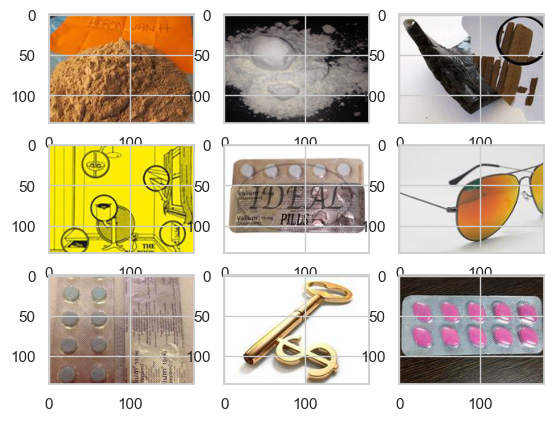

In [80]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB))
plt.show()

In [81]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [82]:
y_train.shape

(97994, 301)

## Encodeo las imagenes

In [83]:
def to_greyscale(image):
    return np.dot(image, [1,1,1])/np.sqrt(255)

In [84]:
to_greyscale(X_train[0]).shape

(135, 180)

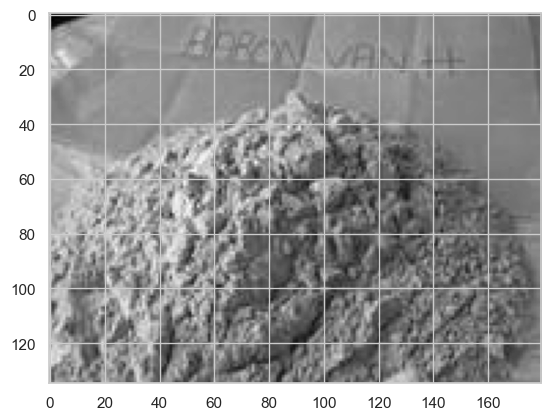

In [85]:
plt.imshow(to_greyscale(X_train[0]), cmap='gist_gray')

In [86]:
def preprocess_image(image):
    return to_greyscale(image)

In [87]:
len(X_train)

97994

In [88]:
train_images = np.asarray([preprocess_image(img) for img in tqdm(X_train, position=0)])

100%|██████████| 97994/97994 [00:56<00:00, 1749.61it/s]


In [89]:
train_images.shape

(97994, 135, 180)

In [101]:
cant_imagenes = train_images.shape[0]
cant_imagenes

97994

In [90]:
train_images[0].shape

(135, 180)

In [91]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [92]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [93]:
y_train.shape

(97994, 301)

In [102]:
tamanio_y_train = y_train.shape[1]
tamanio_y_train

301

In [94]:
y_train = y_train.astype(np.float)

In [95]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [96]:
onehot_train_labels = y_train

# Entreno el modelo 2

In [97]:
import tensorflow as tf; print(tf.__version__)

2.7.0


In [98]:
import keras; print(keras.__version__)

2.7.0


In [106]:
from tensorflow.keras.layers import Dense, Input, Conv2D, GlobalMaxPooling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [107]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.layers import Input

# build a sequential model
model = Sequential()
model.add(Input(shape=(135,180,1)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())

# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(units=tamanio_y_train, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 135, 180, 25)      650       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 68, 90, 25)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 45, 50)        31300     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 23, 50)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 17, 23, 50)       200       
 hNormalization)                                                 
                                                      

In [110]:
hist = model.fit(train_images.reshape((cant_imagenes,135,180,1)), onehot_train_labels, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
1379/1379 [==============================] - 934s 675ms/step - loss: 0.0222 - accuracy: 0.1742 - val_loss: 0.0131 - val_accuracy: 0.2903
Epoch 2/10
1379/1379 [==============================] - 913s 662ms/step - loss: 0.0112 - accuracy: 0.3694 - val_loss: 0.0093 - val_accuracy: 0.4251
Epoch 3/10
1379/1379 [==============================] - 878s 637ms/step - loss: 0.0087 - accuracy: 0.4602 - val_loss: 0.0086 - val_accuracy: 0.4491
Epoch 4/10
1379/1379 [==============================] - 877s 636ms/step - loss: 0.0077 - accuracy: 0.4979 - val_loss: 0.0078 - val_accuracy: 0.4810
Epoch 5/10
1379/1379 [==============================] - 808s 586ms/step - loss: 0.0071 - accuracy: 0.5175 - val_loss: 0.0072 - val_accuracy: 0.4898
Epoch 6/10
1379/1379 [==============================] - 784s 569ms/step - loss: 0.0067 - accuracy: 0.5324 - val_loss: 0.0077 - val_accuracy: 0.4833
Epoch 7/10
1379/1379 [==============================] - 779s 565ms/step - loss: 0.0065 - accuracy: 0.5399 - val_

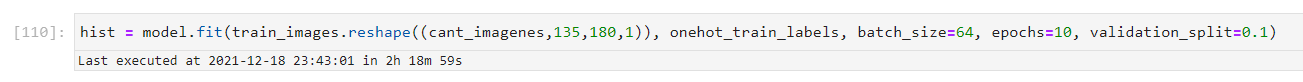

In [111]:
import matplotlib.pyplot as plt

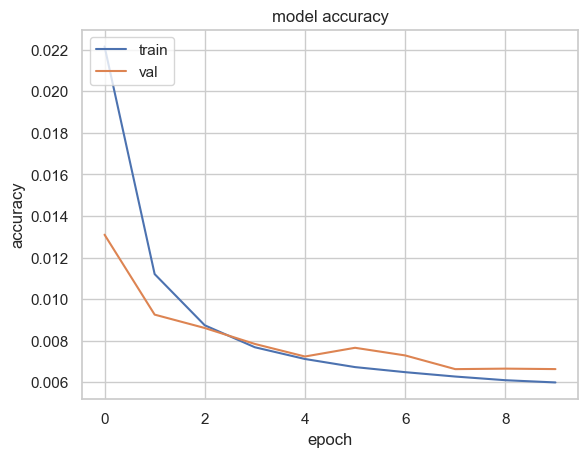

In [112]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

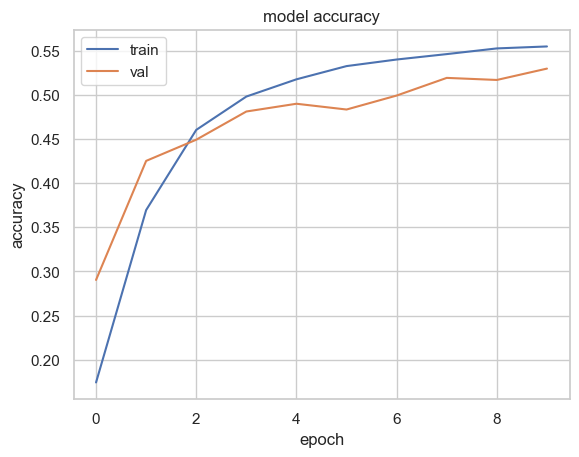

In [113]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Aplico en test

In [114]:
test_images = np.asarray([preprocess_image(img) for img in tqdm(X_test, position=0)])

100%|██████████| 48267/48267 [00:39<00:00, 1214.47it/s]


In [115]:
test_images

array([[[47.90615827, 47.90615827, 47.90615827, ..., 47.90615827,
         47.90615827, 47.90615827],
        [47.90615827, 47.90615827, 47.90615827, ..., 47.90615827,
         47.90615827, 47.90615827],
        [47.90615827, 47.90615827, 47.90615827, ..., 47.90615827,
         47.90615827, 47.90615827],
        ...,
        [47.90615827, 47.90615827, 47.90615827, ..., 47.90615827,
         47.90615827, 47.90615827],
        [47.90615827, 47.90615827, 47.90615827, ..., 47.90615827,
         47.90615827, 47.90615827],
        [47.90615827, 47.90615827, 47.90615827, ..., 47.90615827,
         47.90615827, 47.90615827]],

       [[ 7.26420178,  7.26420178,  7.26420178, ...,  6.19962048,
          6.19962048,  6.38748777],
        [ 7.07633449,  7.07633449,  7.07633449, ...,  6.19962048,
          6.19962048,  6.38748777],
        [ 7.07633449,  6.8884672 ,  6.8884672 , ...,  6.38748777,
          6.38748777,  6.38748777],
        ...,
        [40.14097706, 37.69870232, 36.75936589, ..., 1

In [116]:
test_images.shape

(48267, 135, 180)

In [117]:
y_test = y_test.astype(np.float)
onehot_test_labels = y_test

In [118]:
onehot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [119]:
onehot_test_labels.shape

(48267, 301)

In [120]:
preds = model.predict(test_images)

In [121]:
preds

array([[6.78112073e-08, 5.18332877e-10, 1.08266389e-10, ...,
        1.38574839e-03, 4.98429742e-08, 2.95353075e-09],
       [6.08033860e-13, 3.23602881e-15, 1.40293869e-16, ...,
        3.10439507e-10, 3.05074033e-09, 9.68055931e-13],
       [3.33640754e-12, 7.23979232e-09, 1.07498416e-07, ...,
        1.78208310e-07, 5.42590078e-06, 5.78720396e-08],
       ...,
       [2.11645899e-15, 3.52553875e-10, 6.61015406e-15, ...,
        1.05454010e-05, 1.14709323e-07, 6.18455509e-09],
       [2.92339679e-15, 1.06292184e-08, 2.24797026e-12, ...,
        3.54913500e-05, 5.84916279e-07, 1.75003922e-09],
       [3.02299497e-09, 2.87801087e-13, 7.95661855e-17, ...,
        3.98030306e-06, 5.24299383e-01, 5.37551991e-13]], dtype=float32)

In [122]:
preds.shape

(48267, 301)

In [123]:
preds = np.argmax(preds, axis=1)

In [124]:
preds

array([ 95,  95, 256, ...,  87,  87, 127], dtype=int64)

In [125]:
preds.shape

(48267,)

In [126]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

In [127]:
rounded_labels = np.argmax(onehot_test_labels, axis=1)
rounded_labels[1]

95

In [128]:
rounded_labels.shape

(48267,)

In [129]:
accuracy_score(rounded_labels, preds)

0.5290156835933454

In [130]:
cm = confusion_matrix(rounded_labels, preds)
cm

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,  42, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   3,   0,   0],
       [  0,   0,   0, ...,   0, 214,   0],
       [  0,   0,   0, ...,   0,   0,   1]], dtype=int64)

In [131]:
cm.shape

(297, 297)

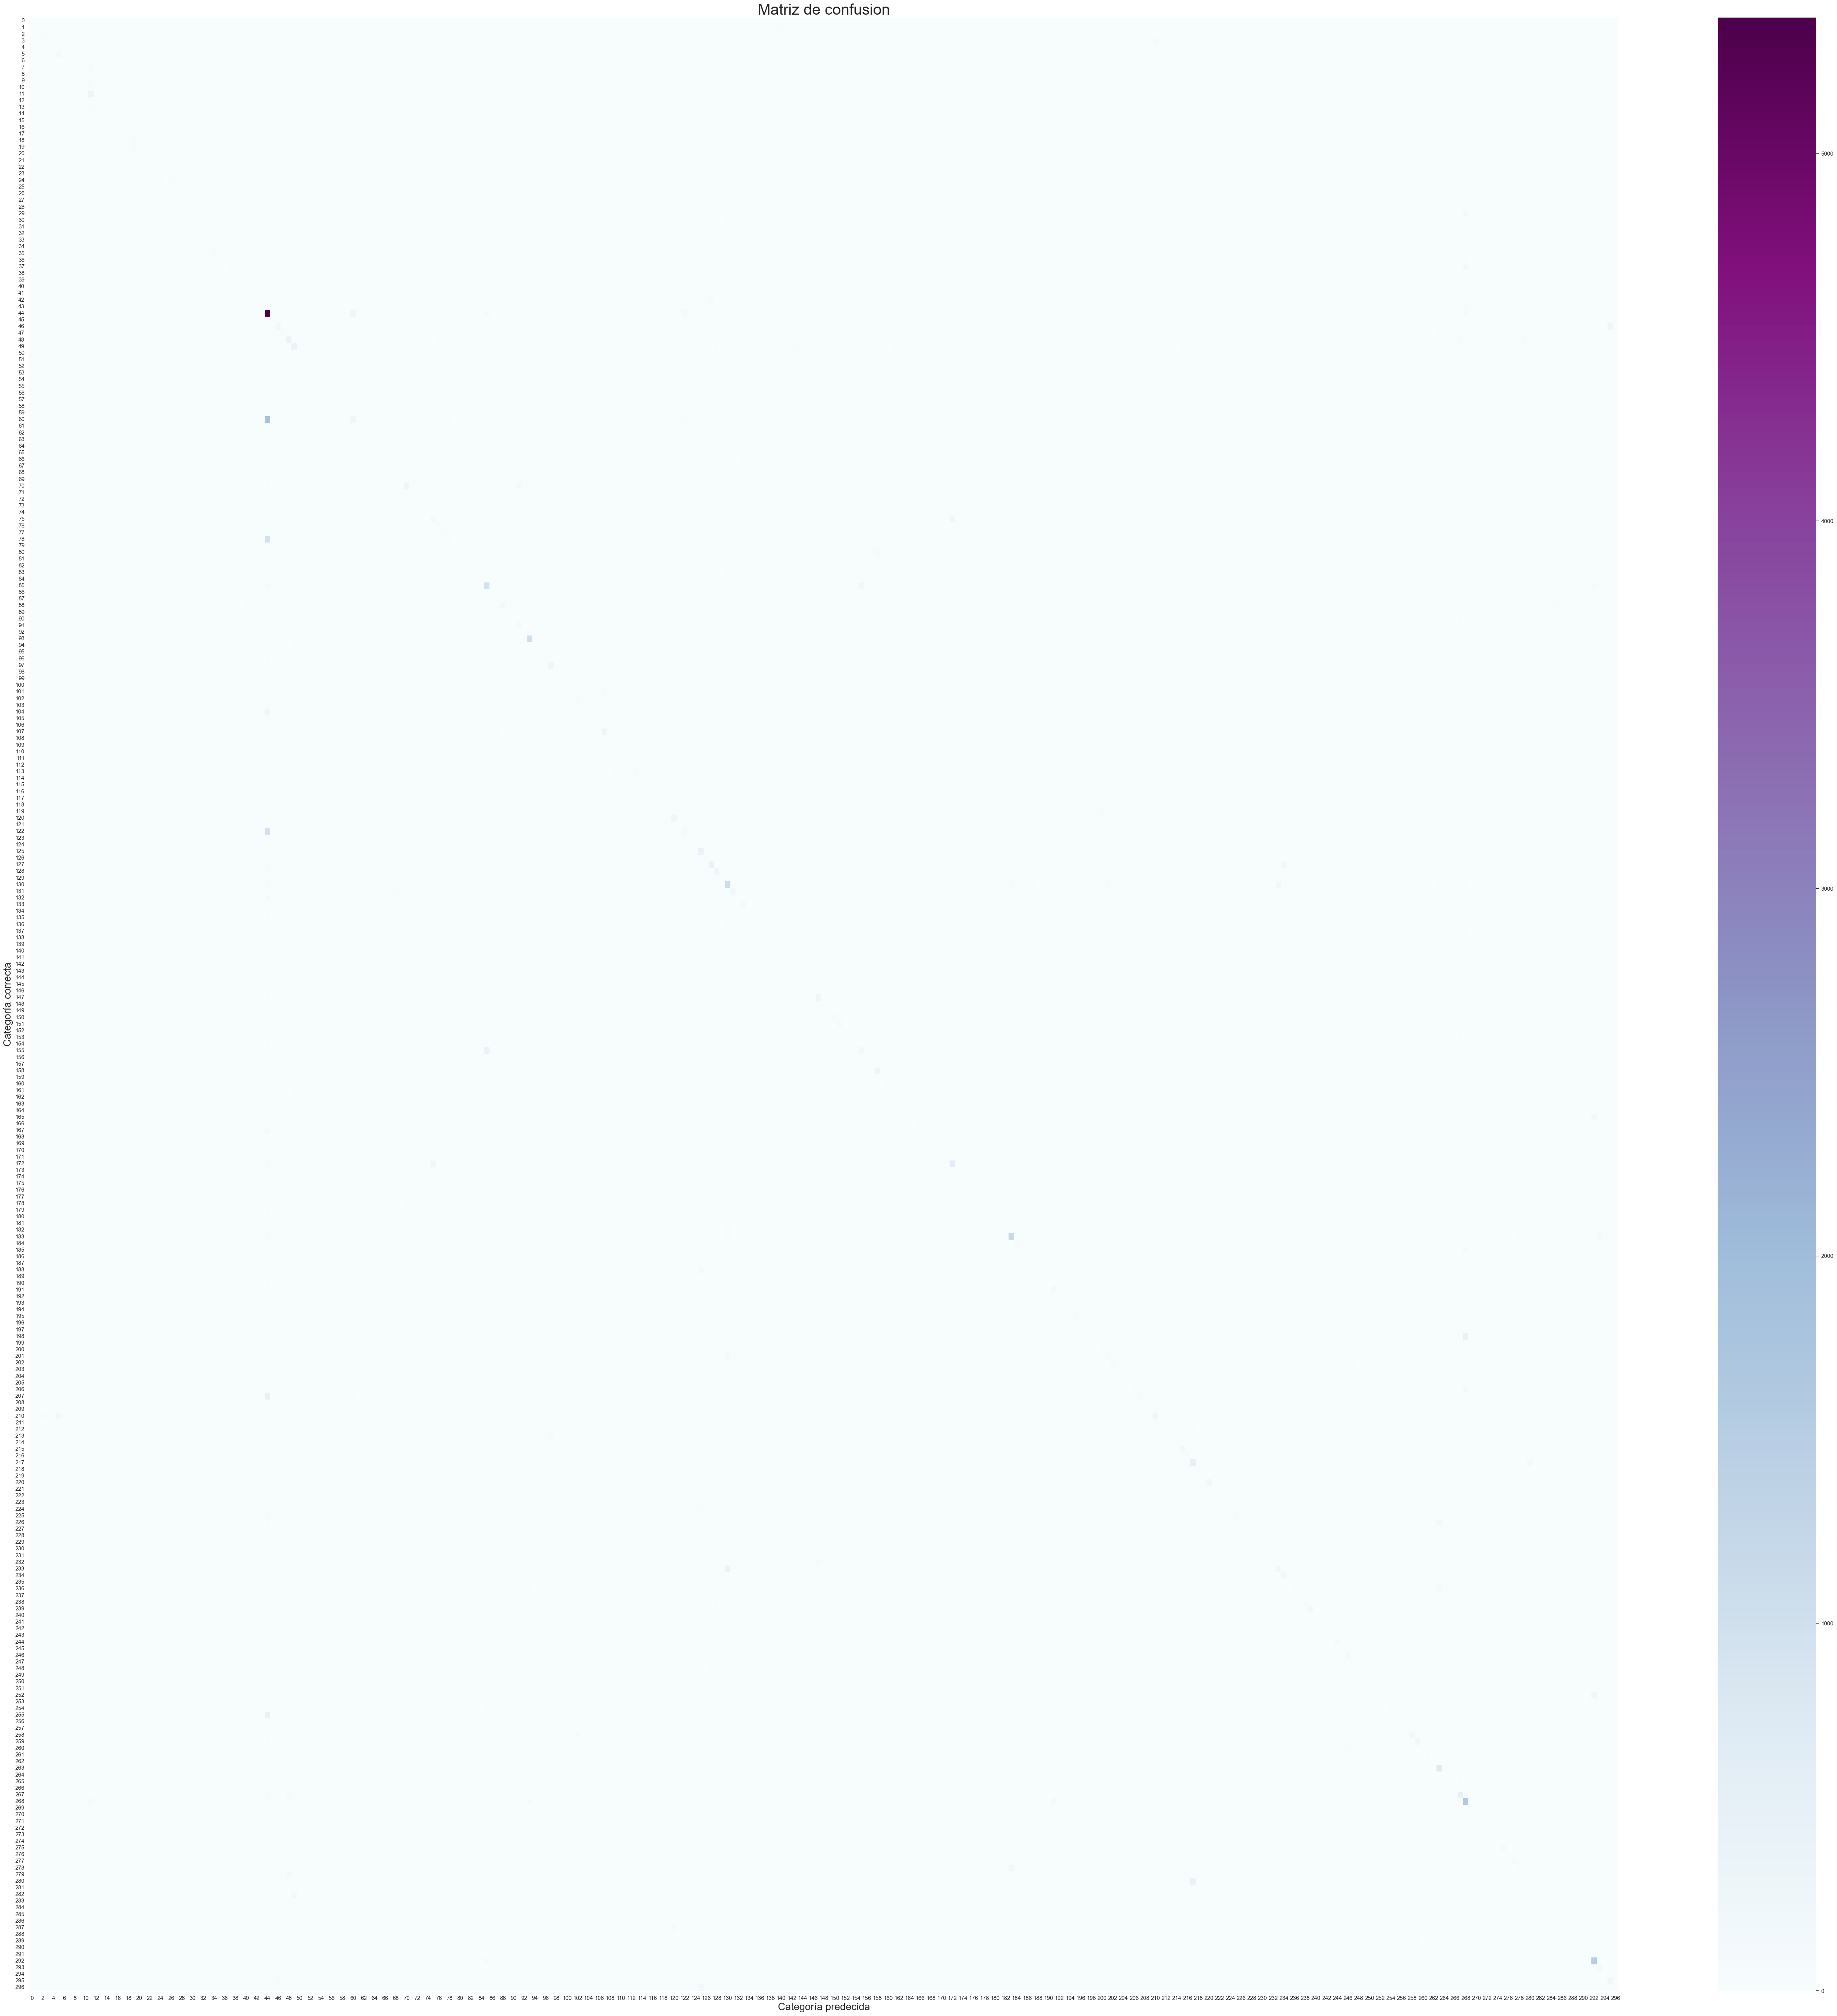

In [148]:
plt.figure(figsize = (70,70))

ax = sns.heatmap(cm, annot=False, cmap="BuPu")
# ax.set_yticklabels([i for i in categorias_encodeadas], rotation=0)
# ax.set_xticklabels([i for i in categorias_encodeadas], rotation=90)
ax.set_xlabel('Categoría predecida', fontsize=20)
ax.set_ylabel('Categoría correcta', fontsize=20)
ax.set_title('Matriz de confusion', fontsize=30)

plt.show()

In [133]:
top_N = 20
idx = np.argpartition(cm, cm.size - top_N, axis=None)[-top_N:]
result = np.column_stack(np.unravel_index(idx, cm.shape))

In [134]:
for i in range(len(result)):
    print("[", result[i][0], " , ", result[i][1], "] = ", cm[result[i][0], result[i][1]])

[ 127  ,  127 ] =  393
[ 155  ,  85 ] =  408
[ 198  ,  268 ] =  421
[ 255  ,  44 ] =  460
[ 280  ,  217 ] =  418
[ 267  ,  267 ] =  504
[ 172  ,  172 ] =  621
[ 85  ,  85 ] =  924
[ 268  ,  268 ] =  1611
[ 44  ,  44 ] =  5370
[ 93  ,  93 ] =  1017
[ 292  ,  292 ] =  1498
[ 78  ,  44 ] =  973
[ 217  ,  217 ] =  521
[ 263  ,  263 ] =  702
[ 122  ,  44 ] =  968
[ 183  ,  183 ] =  1181
[ 60  ,  44 ] =  1861
[ 207  ,  44 ] =  506
[ 130  ,  130 ] =  1101


In [157]:
for i in range(len(result)):
    print("[", categorias_encodeadas[result[i][0]], " , ", categorias_encodeadas[result[i][1]], "] = ", cm[result[i][0], result[i][1]])

[ Dissociatives  ,  Dissociatives ] =  393
[ HCG  ,  Butylone ] =  408
[ Metenelone  ,  Stendra ] =  421
[ Scales  ,  Accessories ] =  460
[ Tan  ,  Opioids ] =  418
[ Stanozolol  ,  Stanozolol ] =  504
[ Kratom  ,  Kratom ] =  621
[ Butylone  ,  Butylone ] =  924
[ Stendra  ,  Stendra ] =  1611
[ Accessories  ,  Accessories ] =  5370
[ Clonazepam  ,  Clonazepam ] =  1017
[ Viagra  ,  Viagra ] =  1498
[ Boldenone  ,  Accessories ] =  973
[ Opioids  ,  Opioids ] =  521
[ Smoking blend  ,  Smoking blend ] =  702
[ Diazepam  ,  Accessories ] =  968
[ MDA  ,  MDA ] =  1181
[ Antihistamine  ,  Accessories ] =  1861
[ Mimosa Hostilis  ,  Accessories ] =  506
[ Drugs  ,  Drugs ] =  1101


# Imagenes categorizadas (predicción)

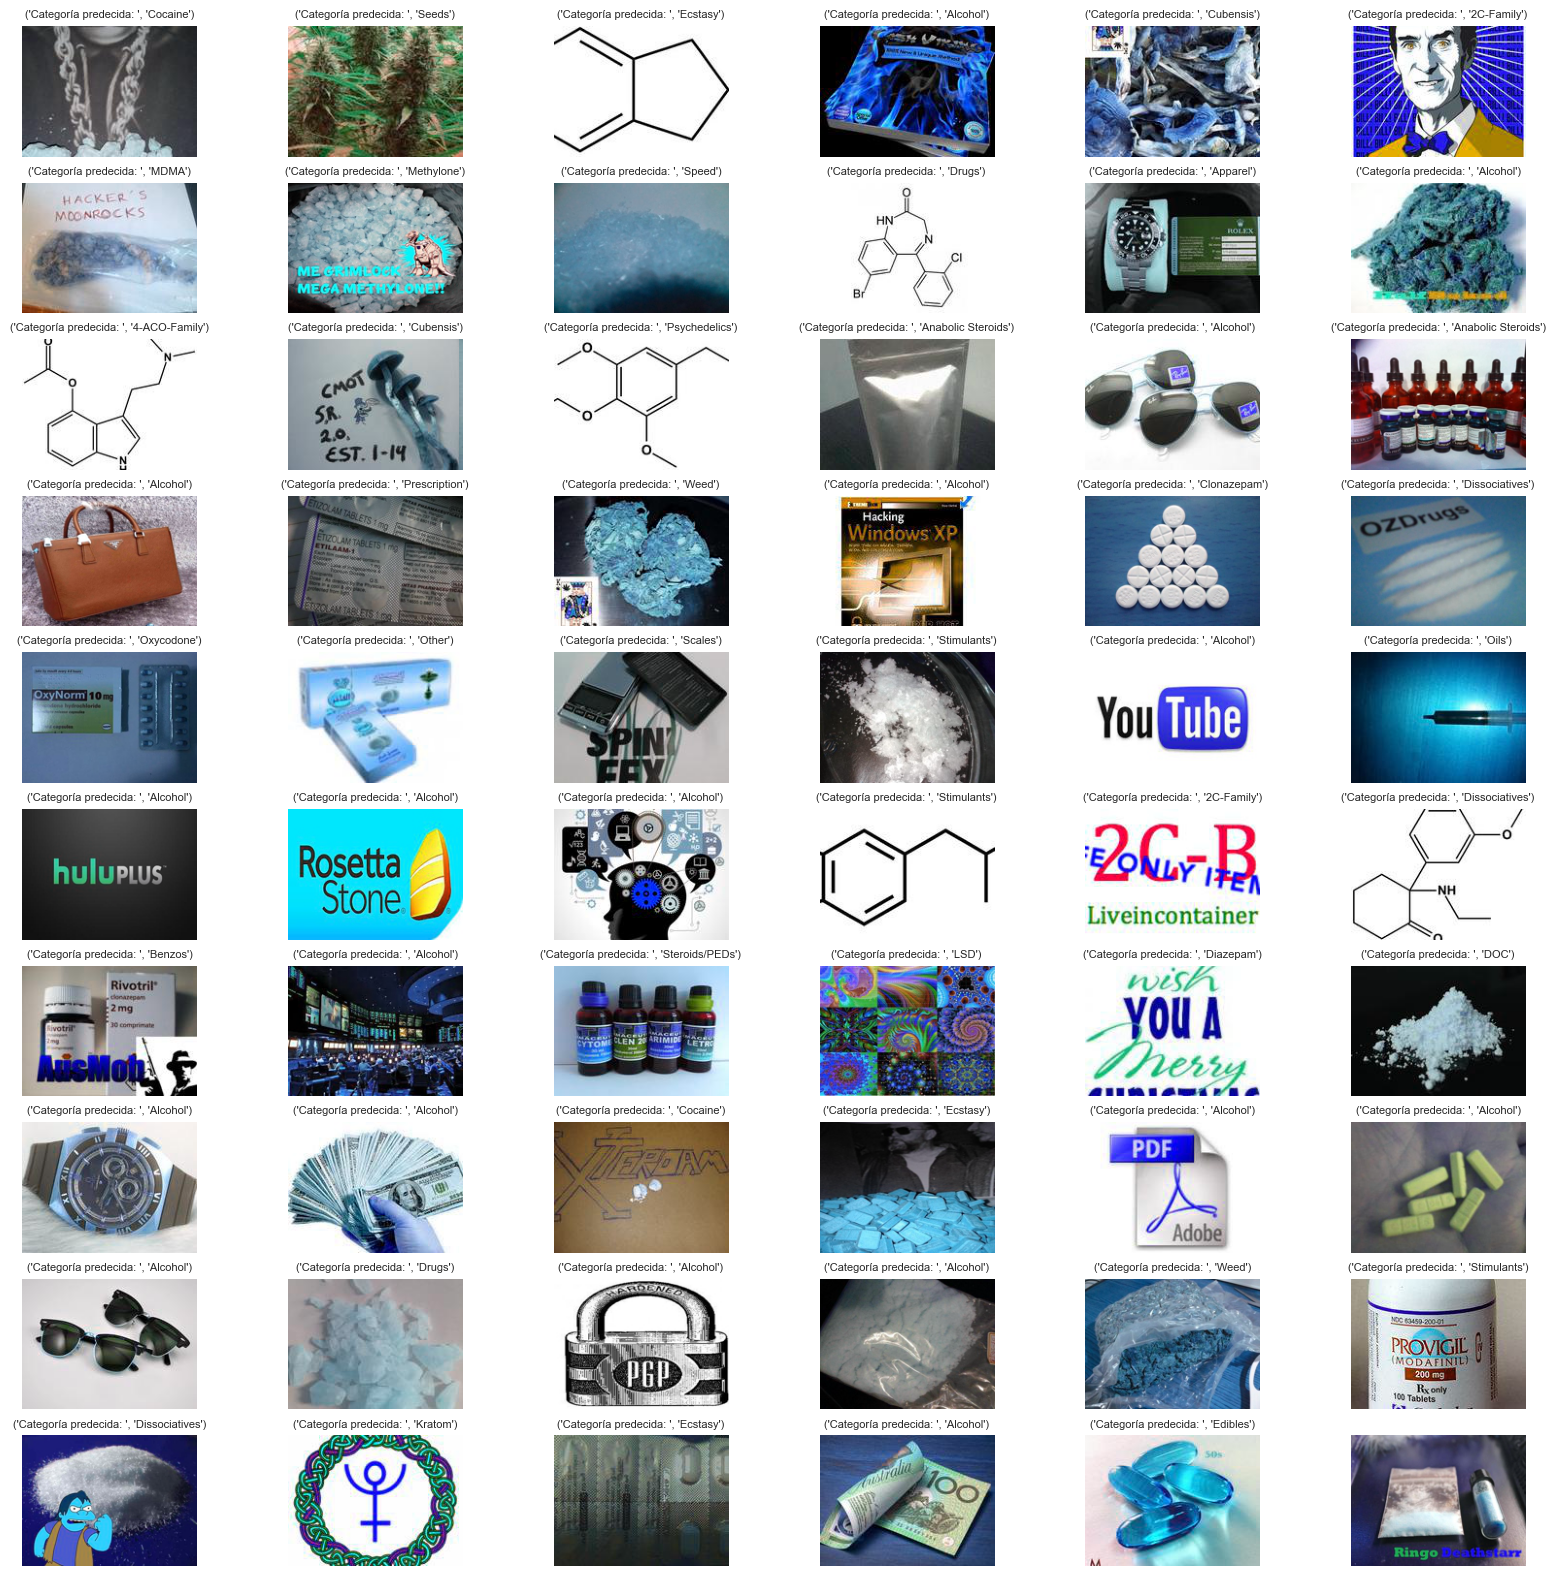

In [147]:
plt.figure(figsize = (20,20))
rows = 10

for num in range(60):
    #print("Categoría predecida: ", preds[num], " - ", categorias_encodeadas[preds[num]])
    plt.title(("Categoría predecida: ", categorias_encodeadas[preds[num]]), fontdict= {'fontsize': 8}, pad=None,)
    plt.subplot(rows, 6, num+1)
    plt.axis('off')
    plt.imshow(X_test[num+1])
    
plt.show()